## Farmland Coverage Analysis

This notebook demonstrates how to use a VisualPrompting model to analyze the area coverage of different types of land or structures on satellite images.

### Installation

In [17]:
# Load LandingLens library from the local repo
!pip install ../../../

Processing /Users/asia/work/repos/landingai-python-v1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for landingai: filename=landingai-0.0.9-py3-none-any.whl size=9856 sha256=73f33371d7eeff917afcb7b9261b9175fe6c398733d87586c4c1af760d23df39
  Stored in directory: /Users/asia/Library/Caches/pip/wheels/70/1a/3e/d40cb628b35404dc22d558368398d25e27b7bd5e02545ec547
Successfully built landingai
  Attempting uninstall: landingai
    Found existing installation: landingai 0.0.9
    Uninstalling landingai-0.0.9:
      Successfully uninstalled landingai-0.0.9

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


### Load images

In [14]:
import numpy as np
from PIL import Image as PILImage

images = [
    np.asarray(PILImage.open("sample_images/1196.png")),
    np.asarray(PILImage.open("sample_images/1514.png")),
    np.asarray(PILImage.open("sample_images/1526.png"))
]

### Example image

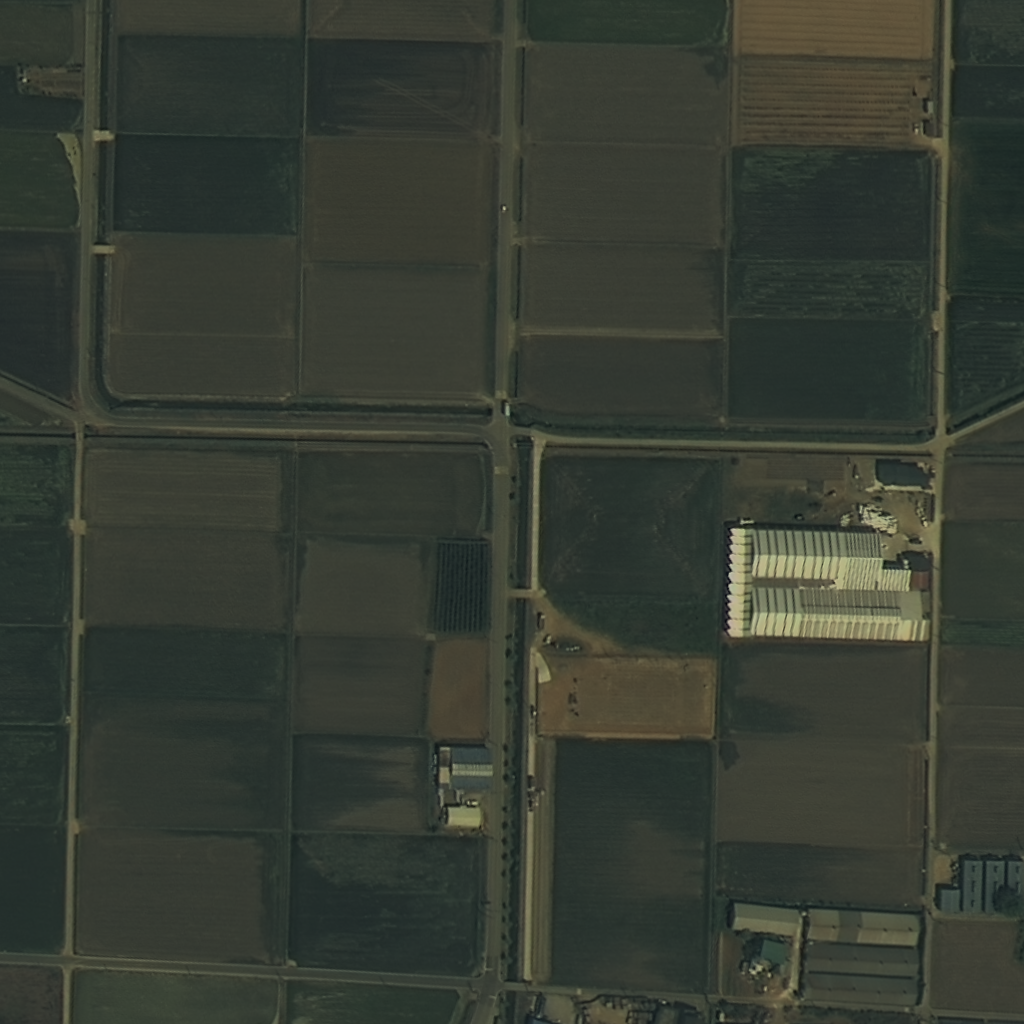

In [16]:
display(PILImage.fromarray(images[0]))

### Run inferences

In [ ]:
#@title Set the following variables as needed for your setup
api_key = "zm7ml657kh9a370k9liluxg9heuoufv"
api_secret = "1ccnesqy4em8dc32k2h2cu5kovdcd6palepaw4ugly6ttfl2fylu340x7ecja0"
endpoint_id = "16049857-67bf-4c60-b20b-899741adbfdf"

In [18]:
from landingai.predict import Predictor

predictor = Predictor(endpoint_id, api_key, api_secret)
predictions = []
for img in images:
        predictions.extend(predictor.predict(img))

### Example image with prediction

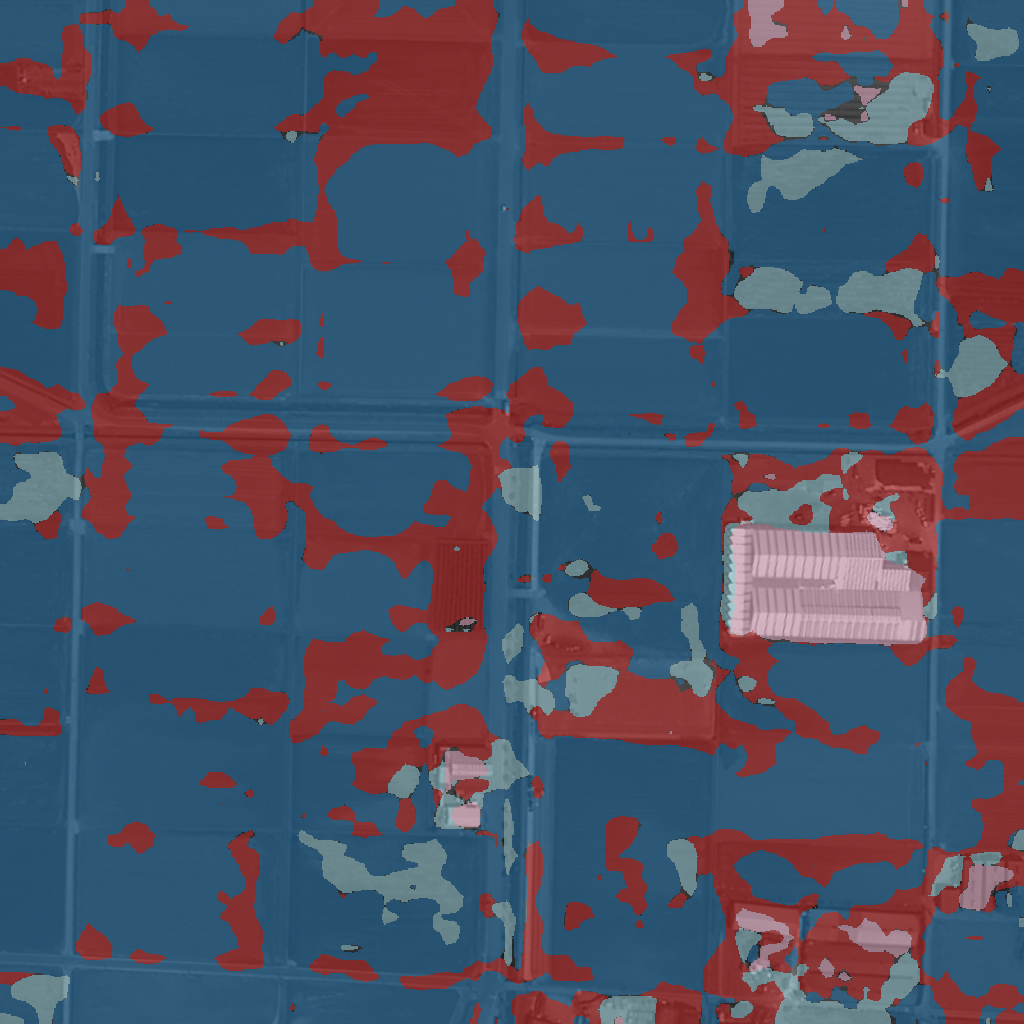

In [35]:
from landingai.visualize import overlay_predictions

predictions = predictor.predict(images[0])
display(overlay_predictions(predictions, images[0]))

### Post-processing: compute the coverage of each class

In [20]:
from landingai.postprocess import segmentation_class_pixel_coverage

coverage = segmentation_class_pixel_coverage(predictions)

### Visualize the predictions in a pie chart

In [29]:
import matplotlib.pyplot as plt

def generate_pie_chart(data: dict[int, (float, str)]) -> None:
    """Generate a pie chart from the coverage data"""

    labels = [val[1] for val in data.values()]
    sizes = [val[0] for val in data.values()]
    unclassified_pixels = 1 - sum(sizes)
    sizes.append(unclassified_pixels)
    labels.append("unclassified")
    _, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

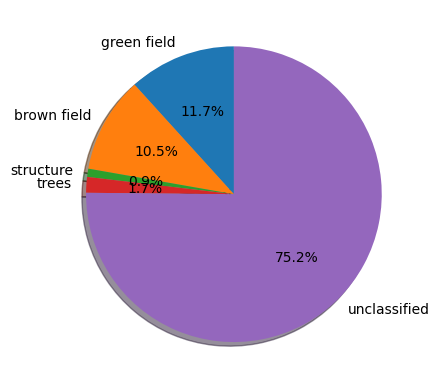

In [30]:
generate_pie_chart(coverage)